In [1]:
import numpy as np
from scipy.io import loadmat

import os

import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['image.cmap'] = 'Blues'

import seaborn as sns

In [2]:
policies = [
    'ens jensen greedy',
    'greedy',
    'round robin greedy',
    'classical ens'
]

n_exps = 20
n_classes = 6
init_size = 1
budget = 100

group_size = n_classes - 1

basepath = os.path.join('../../data/results/square', str(group_size))


queried_xs = np.ones((len(policies), n_exps, init_size + budget, 2)) * -1

for p_ind, policy in enumerate(policies):
    for i in range(n_exps):
        queries = np.loadtxt(
            os.path.join(basepath, policy, f'{policy}__ind__{i + 1}.csv'),
            dtype=int
        ).flatten() - 1
        
        xs = loadmat(
            f'../../data/square/square_nearest_neighbors_{i + 1}.mat'
        )['x']
        
        queried_xs[p_ind, i, :, :] = xs[queries, :]
        
assert np.all(queried_xs != -1)

In [3]:
queried_xs.shape

(4, 20, 101, 2)

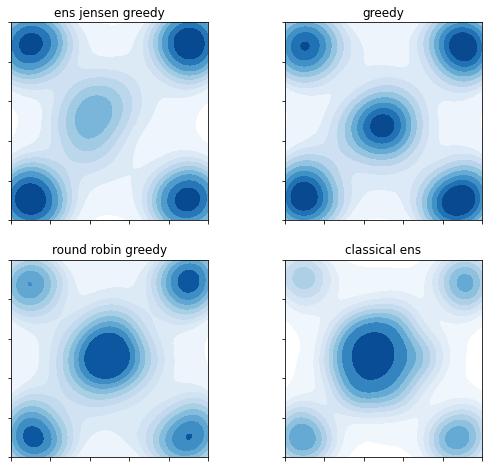

In [17]:
num_rows = len(policies) // 2
if len(policies) % 2 != 0:
    num_rows + 1
fig, ax = plt.subplots(num_rows, 2, figsize=(9, 4 * num_rows))

for p_ind, policy in enumerate(policies):
    tmp_ax = ax[p_ind // 2][p_ind % 2]
    
    sns.kdeplot(
        x=queried_xs[p_ind, :, :, 0].flatten(),
        y=queried_xs[p_ind, :, :, 1].flatten(),
        ax=tmp_ax, 
        fill=True, 
        cmap="Blues"
    )
    
    tmp_ax.set_xlim(0, 1)
    tmp_ax.set_ylim(0, 1)
    tmp_ax.set_xticklabels([])
    tmp_ax.set_yticklabels([])
    tmp_ax.set_aspect('equal', 'box')
    tmp_ax.set_title(policy)

plt.show()